# Example 5A: Classification with Linear Regression and Ordinal Encoding

Classification is a fundamental concept in machine learning and statistics, involving the process of predicting the category or class of a given input data point. Classes can be anything, including customer types, importantce ratings for emails, diagnoses, and political affiliation. 

Classification using linear regression involves applying linear regression techniques to a classification problem, where the target variable is categorical and encoded numerically. 

### Process

- **Label Encoding:** Labels need to be encoded either as ordinals ($0, 1, 2, \ldots$) or vectors ($[1, 0, 0], [0, 1, 0], [0, 0, 1]$). This vector encoding is often called **One-Hot**, which is discussed in Example 5B. These encodings represent the classes. 
- **Model Fitting:** After the data is encoded, the linear regression model is fit to the data, where the outcome variable is the probability of belonging to one of the classes.
- **Rounding:** Some form of rounding is implemented to convert predictions into a specific class. Predictions above this threshold are classified as one class, and those below are classified as the other class.

An important consideration is whether the data satisfies the assumptions of linear regression. While we do not emphasize this, it is important to ensure that these assumptions are reasonable for the given application. 

In [1]:
# Standard imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.api as sm

# Required for modeling and evaluation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

Here, we generate data involving three groups: 
1. Ranging $0 + \epsilon \leq x_1 \leq 5 + \epsilon$
2. Ranging $5 + \epsilon \leq x_1 \leq 10 + \epsilon$
3. Ranging $10 + \epsilon \leq x_1 \leq 15 + \epsilon$

The group classifications are 0, 1, 2, respectively. The goal is to construct a linear regression model that effectively finds these boundaries. 

Since there are no hyperparameters, we have no need for a validation set. Instead, we just use a testing set to provide metrics on the final model. We choose an 80%-20% split between training and testing. 

In [2]:
np.random.seed(5)

# Generate synthetic data
size_per_class = 100
x1_0 = np.random.uniform(0, 5, size_per_class) + np.random.normal(0, 1, 100)
x2_0 = np.random.uniform(0, 10, size_per_class)

x1_1 = np.random.uniform(5, 10, size_per_class) + np.random.normal(0, 1, 100)
x2_1 = np.random.uniform(0, 10, size_per_class)

x1_2 = np.random.uniform(10, 15, size_per_class) + np.random.normal(0, 1, 100)
x2_2 = np.random.uniform(0, 10, size_per_class)

# Combine data
x1 = np.concatenate([x1_0, x1_1, x1_2])
x2 = np.concatenate([x2_0, x2_1, x2_2])
y = np.array([0]*size_per_class + [1]*size_per_class + [2]*size_per_class)

# Create DataFrame
data = pd.DataFrame({'X1': x1, 'X2': x2, 'Y': y})

# Splitting data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(data[['X1', 'X2']], data['Y'], test_size=0.2, random_state=5)

Because the data exists in two dimensions, let's plot the location of each class within the trainings set. 

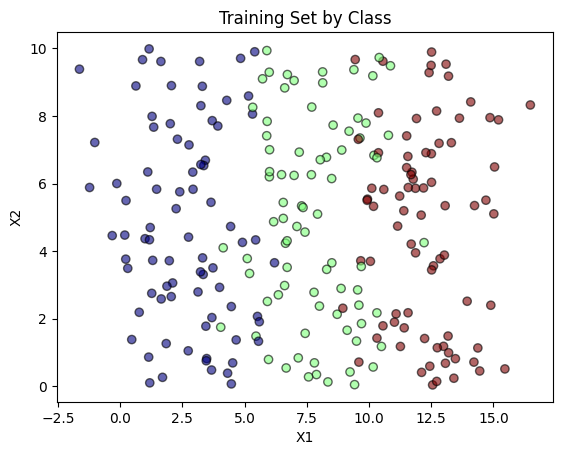

In [3]:
# Plot training set
plt.scatter(X_train['X1'], X_train['X2'], c=Y_train, edgecolors='k', cmap=plt.cm.jet, alpha=0.6)
plt.title("Training Set by Class")
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

Linear regression is performed in exactly the same was as before. The novelty here is that the outputs represent classes, so rounding is necessary. 

In [4]:
# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Predict on the testing set
Y_pred = np.round(model.predict(X_test)) # rounded


When evaluating a classification problem, we no longer look at mean squared error, mean absolute error or mean squared error. Instead, we are interest in how accurately the model classifies points. Here, we consider how effective the model is in classifying the testing set--points to which the model is "blind" to since they are distinct from the training set. The score provides a guess for how well the model will do in general. 

In [5]:
# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy of the model: {accuracy:.2f}")

Accuracy of the model: 0.85


Going a step further, we can provide a visualization of the classification performed by the linear model and plot the testing set. This tells us where the points fall in relation to the **decision boundary**--a line that separates two classes. 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


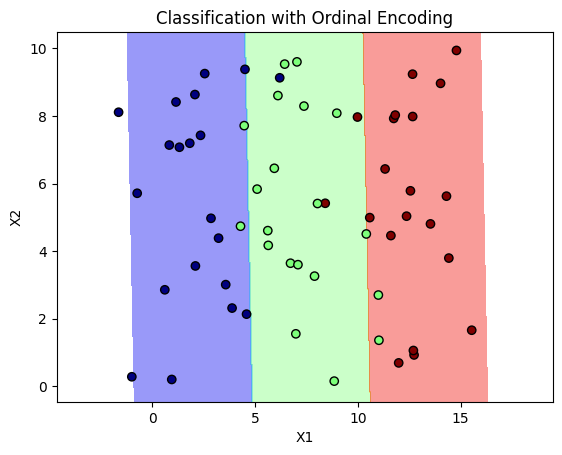

In [6]:
# Setting up the meshgrid for plotting decision boundaries
x1_min, x1_max = data['X1'].min() - 3, data['X1'].max() + 3
x2_min, x2_max = data['X2'].min() - 0.5, data['X2'].max() + 0.5
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 500), np.linspace(x2_min, x2_max, 500))

# Predict on meshgrid
Z = np.round(model.predict(np.c_[xx1.ravel(), xx2.ravel()])) # rounded
Z = Z.reshape(xx1.shape)

# Plot decision boundaries and data points
plt.contourf(xx1, xx2, Z, alpha=0.4, levels=np.arange(-0.5, 2.5, 0.5), cmap=plt.cm.jet)
plt.scatter(X_test['X1'], X_test['X2'], c=Y_test, edgecolors='k', cmap=plt.cm.jet)
plt.title("Classification with Ordinal Encoding")
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

Accuracy only tells you what percentage of points were correctly classified, but this is not the whole story. A classification matrix describes a more complete picture of what is happening.

## Confusion Matrix

A confusion matrix is a table used to **evaluate the performance of a classification model** on a set of test data for which the true values are known. It's particularly useful for binary classification tasks but can be extended to multiclass problems. The matrix compares the actual target values with the model's predictions.

### Structure in Binary Classification

1. **True Positives (TP)**: Instances correctly predicted as positive (e.g., correctly identifying sick patients).
2. **True Negatives (TN)**: Instances correctly predicted as negative (e.g., correctly identifying healthy patients).
3. **False Positives (FP)**, also Type I Error: Instances incorrectly predicted as positive (e.g., identifying healthy patients as sick).
4. **False Negatives (FN)**, also Type II Error: Instances incorrectly predicted as negative (e.g., identifying sick patients as healthy).

The matrix is typically as follows:

|                   | Predicted Positive | Predicted Negative |
|-------------------|--------------------|--------------------|
| **Actual Positive** | True Positives (TP) | False Negatives (FN)|
| **Actual Negative** | False Positives (FP) | True Negatives (TN) |

### Importance and Usage

- **Accuracy Assessment**: Enables calculation of metrics like accuracy, precision, recall, and F1-score.
- **Error Analysis**: Provides insights into the type of errors made by the model.
- **Balanced Performance**: Useful in cases of class imbalance.

A confusion matrix offers a detailed performance breakdown, essential for evaluating classification models.


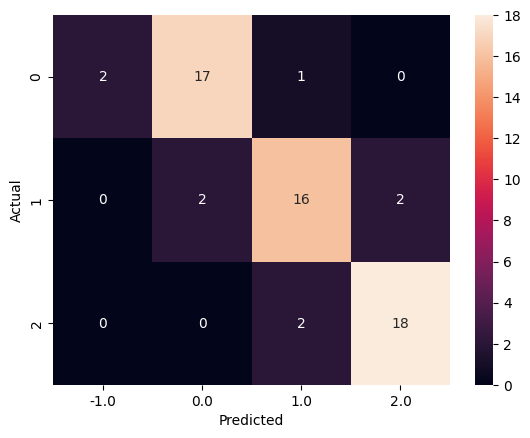

In [7]:
# Calculate confusion matrix
confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
plt.show()

## Precision and Recall

Precision and recall are two important metrics used in the evaluation of classification models, especially in contexts where the balance between false positives and false negatives of a given class.

### Precision
- **Definition**: Precision measures the accuracy of positive predictions.
- **Formula**: `Precision = True Positives / (True Positives + False Positives)`
- **Interpretation**: It answers the question, "Of all the instances predicted as positive, how many are actually positive?" High precision indicates a low rate of false positives.

### Recall
- **Definition**: Recall, also known as *sensitivity*, measures the ability of a model to find all the relevant cases (all actual positives).
- **Formula**: `Recall = True Positives / (True Positives + False Negatives)`
- **Interpretation**: It answers the question, "Of all the actual positive instances, how many did the model correctly identify?" High recall indicates a low rate of false negatives.

Based on the above confusion matrix, we can compute precision and recall for each of the three classes. 

|--|--|--|
| Class | Precision | Recall |
|--|--|--|
| 0 | 17/20 | 17/19 |
| 1 | 16/20 | 16/19 |
| 2 | 18/20 | 18/20 |
|--|--|--|

## Improvements

Could the model improve with some of the standard techniques for linear regression? Yes!
For example, we can perform the standard statistical tests of OLS linear regression to see if the model picks up on the fact that $X_1$ is the only dimension relevant to the classiciation. It does!

In [8]:
X_sm = sm.add_constant(X_train)
smodel = sm.OLS(Y_train, X_sm).fit()
print(smodel.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     639.6
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           3.09e-96
Time:                        19:46:17   Log-Likelihood:                -69.187
No. Observations:                 240   AIC:                             144.4
Df Residuals:                     237   BIC:                             154.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3484      0.055     -6.283      0.0

Notice that the coefficient for $X_2$ is not statsitically significant from 0. Under these conditions, we would rerun the model without $X_2$. Let's quickly do this. 

In [9]:
# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train[['X1']], Y_train) # Only considering X_1

# Predict on the testing set
Y_pred = np.round(model.predict(X_test[['X1']])) # rounded

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy of the model: {accuracy:.2f}")

Accuracy of the model: 0.87


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


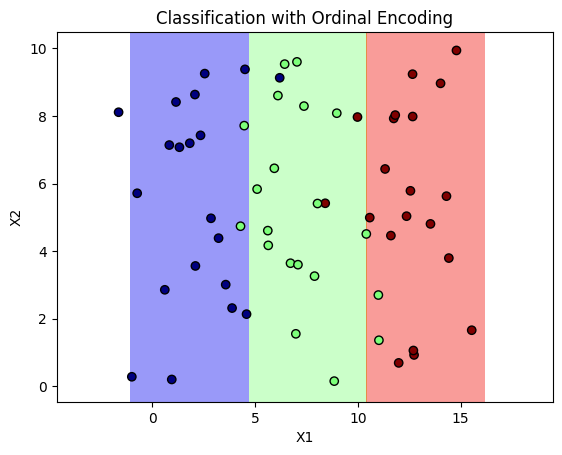

In [10]:
# Setting up the meshgrid for plotting decision boundaries
x1_min, x1_max = data['X1'].min() - 3, data['X1'].max() + 3
x2_min, x2_max = data['X2'].min() - 0.5, data['X2'].max() + 0.5
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 500), np.linspace(x2_min, x2_max, 500))

# Predict on meshgrid
Z = np.round(model.predict(np.c_[xx1.ravel()])) # rounded
Z = Z.reshape(xx1.shape)

# Plot decision boundaries and data points
plt.contourf(xx1, xx2, Z, alpha=0.4, levels=np.arange(-0.5, 2.5, 0.5), cmap=plt.cm.jet)
plt.scatter(X_test['X1'], X_test['X2'], c=Y_test, edgecolors='k', cmap=plt.cm.jet)
plt.title("Classification with Ordinal Encoding")
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

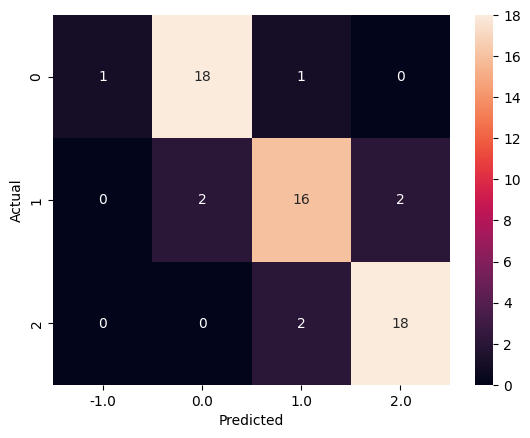

In [11]:
# Calculate confusion matrix
confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
plt.show()

We see a slight improvement with this new model, where one test point that was previously incorrectly classified as -1 is now classified as 0. 

Because precision and recall are so important, there are methods for computing these; however, they are aggregates of the precision and recall values of all classes. There are three ways in which these values are aggregated: 

1. **Macro averaging:** Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
2. **Weighted averaging:** Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance.
3. **Micro averaging:** Aggregate the contributions of all classes to compute the average metric. In a multi-class classification setup, micro-average is preferable if you suspect there might be class imbalance.

Weighted and micro averaging are more common to use over macro averaging. 

In [12]:
# Calculate Precision and Recall for each averaging method
precision_macro = precision_score(Y_test, Y_pred, average='macro')
recall_macro = recall_score(Y_test, Y_pred, average='macro')

precision_weighted = precision_score(Y_test, Y_pred, average='weighted')
recall_weighted = recall_score(Y_test, Y_pred, average='weighted')

precision_micro = precision_score(Y_test, Y_pred, average='micro')
recall_micro = recall_score(Y_test, Y_pred, average='micro')

print(f'Macro Precision: {precision_macro}')
print(f'Macro Recall: {recall_macro}')
print(f'Weighted Precision: {precision_weighted}')
print(f'Weighted Recall: {recall_weighted}')
print(f'Micro Precision: {precision_micro}')
print(f'Micro Recall: {recall_micro}')

Macro Precision: 0.6605263157894736
Macro Recall: 0.65
Weighted Precision: 0.8807017543859649
Weighted Recall: 0.8666666666666667
Micro Precision: 0.8666666666666667
Micro Recall: 0.8666666666666667


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


You might wonder how one explicitly finds the decision boundaries for such a classification. Luckily, the process is mathematically straightforward, we solve for when the classification is ambiguous. This happens when $\hat y \in \left\{-0.5, 0.5, 1.5, 2.5 \right\}$. At these values, we find the boundaries of the classes 0, 1, and 2. 

We skip this computation; however, you should be able to perform this. It involves: 
1. Finding the coefficients of the linear regression model.
2. Plugging in the value corresponding to the decision boundary you are interested in.
3. Solving the equation so it is written as $X_2 = g(X_1)$. 